In [298]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [299]:
tweets= pd.read_csv(r"tweets_by_day.csv")
covid = pd.read_csv(r"C:\Users\Ngoc\Desktop\COVID and Elearning\Code\COVID-19-and-Online-Learning\Data\covid-data.csv")

In [300]:
tweets['total_tweets'] = tweets.sum(axis=1)

In [301]:
tweets.head()

,Unnamed: 0,dates,Digital Access,Online Education,Support Resources,Virtual Help,total_tweets
0,0,2020-03-10,15.0,10.0,12.0,13.0,50.0
1,1,2020-03-11,38.0,12.0,34.0,26.0,111.0
2,2,2020-03-12,51.0,9.0,45.0,50.0,157.0
3,3,2020-03-13,60.0,36.0,68.0,87.0,254.0
4,4,2020-03-14,52.0,44.0,20.0,31.0,151.0


In [302]:
tweets['dates'] = pd.to_datetime(tweets['dates'], errors='coerce')


In [303]:
# tweets['dates'] = tweets['dates'].dt.strftime("%d/%m/%Y")

In [304]:
tweets['dates'][0:5]

0   2020-03-10
1   2020-03-11
2   2020-03-12
3   2020-03-13
4   2020-03-14
Name: dates, dtype: datetime64[ns]

In [305]:
tweets.head()

,Unnamed: 0,dates,Digital Access,Online Education,Support Resources,Virtual Help,total_tweets
0,0,2020-03-10,15.0,10.0,12.0,13.0,50.0
1,1,2020-03-11,38.0,12.0,34.0,26.0,111.0
2,2,2020-03-12,51.0,9.0,45.0,50.0,157.0
3,3,2020-03-13,60.0,36.0,68.0,87.0,254.0
4,4,2020-03-14,52.0,44.0,20.0,31.0,151.0


In [306]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,12/31/2019,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,1/2/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [307]:
covid = covid[covid['location'] == 'World']

In [308]:
covid=covid.rename(columns={"date": "dates"})

In [309]:
covid = covid.drop(['iso_code', 'continent', 'location', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'], axis=1)

In [310]:
covid['dates'] = pd.to_datetime(covid['dates'], errors='coerce')


In [311]:
covid.head()

,dates,total_cases,new_cases,total_deaths,new_deaths
35430,2019-12-31,27.0,27.0,0.0,0.0
35431,2020-01-01,27.0,0.0,0.0,0.0
35432,2020-01-02,27.0,0.0,0.0,0.0
35433,2020-01-03,44.0,17.0,0.0,0.0
35434,2020-01-04,44.0,0.0,0.0,0.0


In [312]:
df = pd.merge(tweets, covid, how = 'left', on = 'dates')

In [313]:
df.tail(10)

,Unnamed: 0,dates,Digital Access,Online Education,Support Resources,Virtual Help,total_tweets,total_cases,new_cases,total_deaths,new_deaths
127,127,2020-07-15,27.0,3.0,15.0,67.0,239.0,13302732.0,223556.0,578347.0,5673.0
128,128,2020-07-16,28.0,5.0,18.0,63.0,242.0,13534635.0,231903.0,583928.0,5581.0
129,129,2020-07-17,29.0,2.0,27.0,73.0,260.0,13789127.0,254492.0,589729.0,5801.0
130,130,2020-07-18,22.0,1.0,10.0,47.0,210.0,14043674.0,254547.0,597193.0,7464.0
131,131,2020-07-19,22.0,1.0,9.0,45.0,208.0,14273647.0,229973.0,602162.0,4969.0
132,132,2020-07-20,45.0,2.0,9.0,43.0,231.0,14482981.0,209334.0,606011.0,3849.0
133,133,2020-07-21,35.0,3.0,17.0,64.0,252.0,14684381.0,201400.0,610119.0,4108.0
134,134,2020-07-22,26.0,1.0,18.0,63.0,242.0,14924057.0,239676.0,616327.0,6208.0
135,135,2020-07-23,34.0,4.0,12.0,51.0,236.0,15205731.0,281674.0,623282.0,6955.0
136,136,2020-07-24,20.0,1.0,17.0,53.0,227.0,15482061.0,276330.0,633109.0,9827.0


In [314]:
df.columns

Index(['Unnamed: 0', 'dates', 'Digital Access', 'Online Education',
       'Support Resources', 'Virtual Help', 'total_tweets', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths'],
      dtype='object')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 11 columns):
Unnamed: 0           137 non-null int64
dates                137 non-null datetime64[ns]
Digital Access       137 non-null float64
Online Education     135 non-null float64
Support Resources    136 non-null float64
Virtual Help         137 non-null float64
total_tweets         137 non-null float64
total_cases          137 non-null float64
new_cases            137 non-null float64
total_deaths         137 non-null float64
new_deaths           137 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 17.8 KB


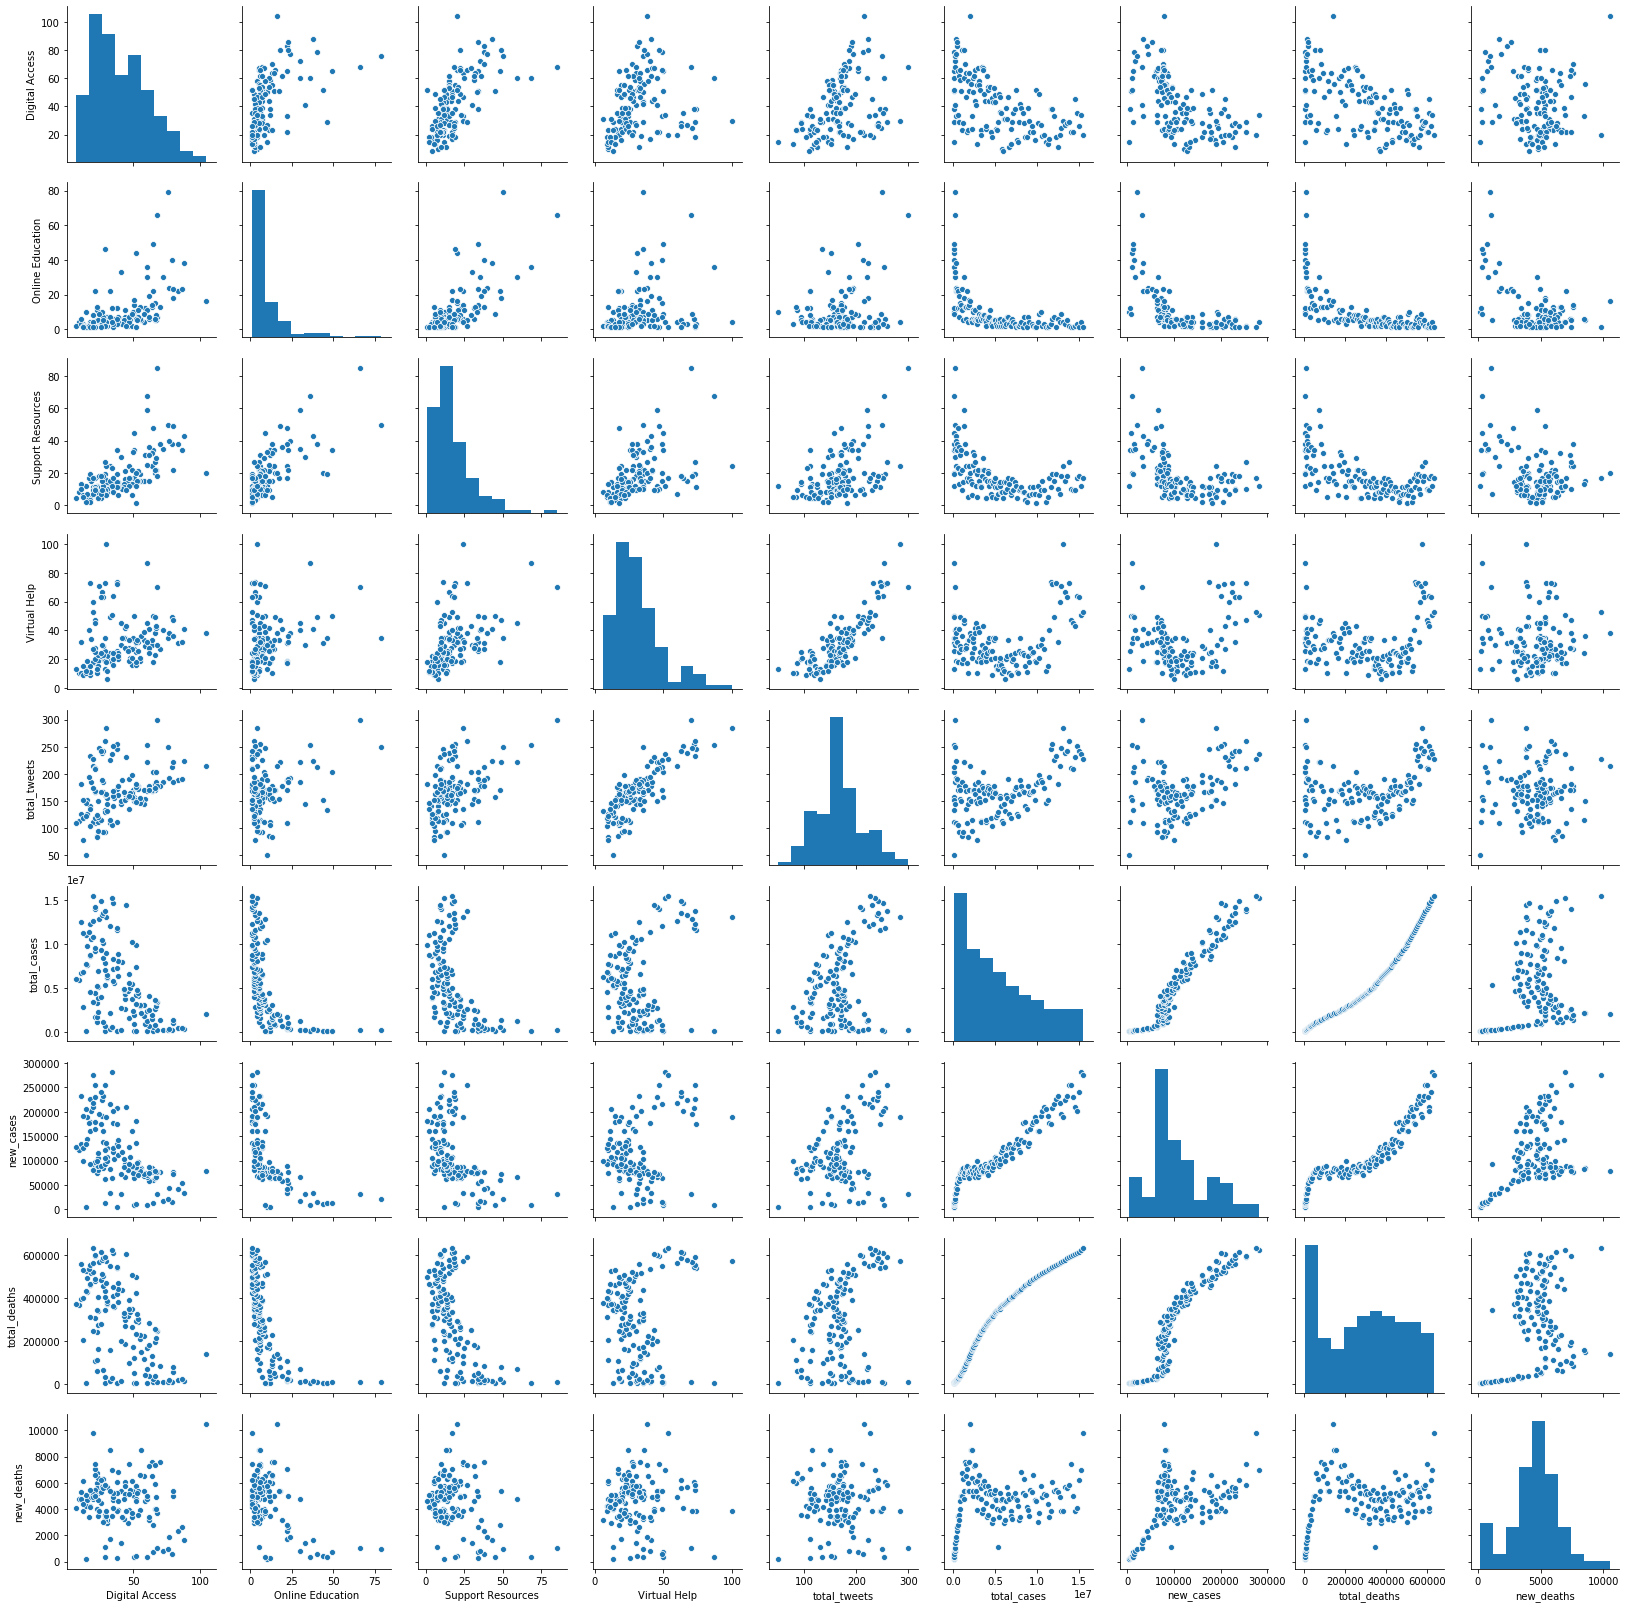

In [316]:
sns.pairplot(df[['Digital Access', 'Online Education',
       'Support Resources', 'Virtual Help', 'total_tweets', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths']])
plt.show()

Text(0.5, 0.98, 'Correlation between COVID-19 New Cases and Online Learning related Tweets')

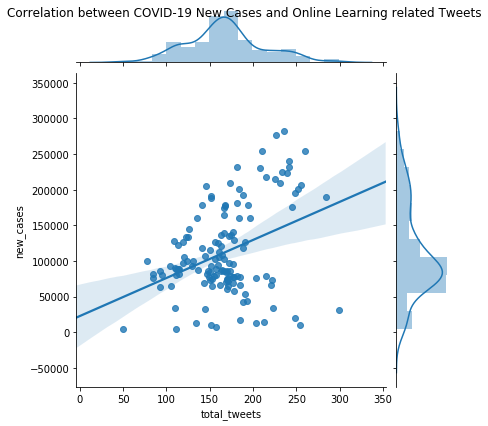

In [319]:
correlation = sns.jointplot(x='total_tweets', y='new_cases', data=df, kind="reg")
correlation.fig.suptitle('Correlation between COVID-19 New Cases and Online Learning related Tweets') 

In [320]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df['new_cases'], df['total_tweets'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.375


Text(0.5, 0.98, 'Correlation between COVID-19 New Deaths  and Online Learning related Tweets')

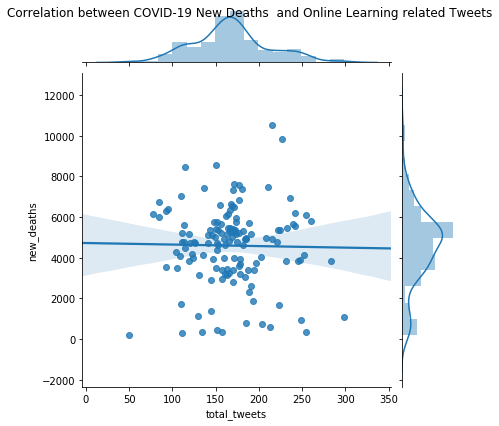

In [321]:
correlation = sns.jointplot(x='total_tweets', y='new_deaths', data=df, kind="reg")
correlation.fig.suptitle('Correlation between COVID-19 New Deaths  and Online Learning related Tweets') 

In [328]:
df['COVID Related Cases'] = df['new_deaths'] + df['new_cases']

Text(0.5, 0.98, 'Correlation between COVID-19 New Cases (Cases and Deaths)  and Online Learning related Tweets')

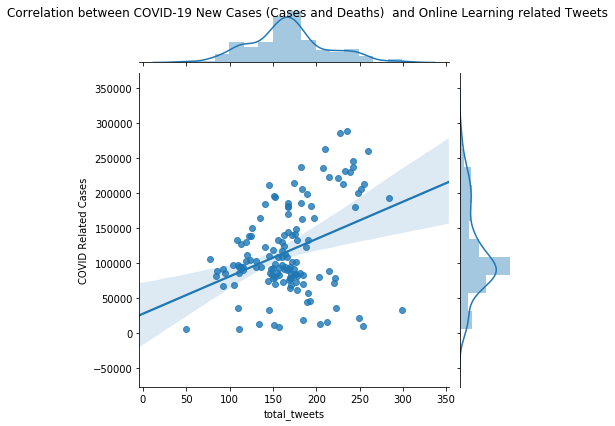

In [329]:
correlation = sns.jointplot(x='total_tweets', y='COVID Related Cases', data=df, kind="reg")
correlation.fig.suptitle('Correlation between COVID-19 New Cases (Cases and Deaths)  and Online Learning related Tweets') 

In [326]:

corr, _ = pearsonr(df['COVID Related Cases'], df['total_tweets'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.369


In [317]:
df.columns

Index(['Unnamed: 0', 'dates', 'Digital Access', 'Online Education',
       'Support Resources', 'Virtual Help', 'total_tweets', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths'],
      dtype='object')

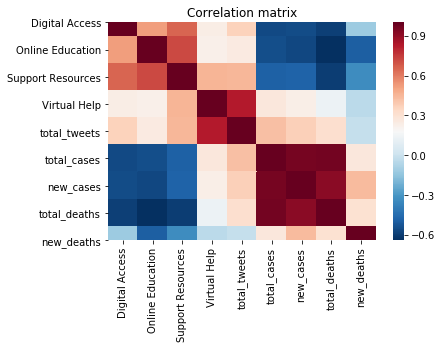

In [318]:

import matplotlib.pyplot as plt

df_corr = df.drop(['Unnamed: 0', 'dates'], axis=1)
corrMatrix = df_corr.corr()
# sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
# plt.title('Correlation matrix')

# plt.show()


sns.heatmap(corrMatrix, 
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()
